# PC 게임 테이블 분석하기

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
df = pd.read_csv('computer_games.csv')
df.info() # Name, Developer, Producer, Genre, Operation System, Date Released

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1095 non-null   object
 1   Developer         1095 non-null   object
 2   Producer          1095 non-null   object
 3   Genre             1095 non-null   object
 4   Operating System  1095 non-null   object
 5   Date Released     1095 non-null   object
dtypes: object(6)
memory usage: 51.5+ KB


## 전처리

### 1. 날짜 데이터 정리
- 날짜 정리
    - 'TBA' 탈락 
    - 연도별로만 정리 : 마지막 4개의 문자만을 이용함
    - 위 조건으로 걸러지지 않는 데이터가 1개 있는데 이는 수기로 입력하겠음

In [60]:
df.drop(index = df[df['Date Released'] == 'TBA'].index, inplace = True)
df['Released_Year'] = df['Date Released'].apply(lambda x : x[-4:])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1093 non-null   object
 1   Developer         1093 non-null   object
 2   Producer          1093 non-null   object
 3   Genre             1093 non-null   object
 4   Operating System  1093 non-null   object
 5   Date Released     1093 non-null   object
 6   Released_Year     1093 non-null   object
dtypes: object(7)
memory usage: 68.3+ KB


In [61]:
# 예외 하나 처리하기
# pd.to_datetime(df['Released_Year'])
# df[df['Released_Year'] == 'ess)']
df.loc[993, 'Released_Year'] = 2022

In [62]:
pd.to_datetime(df['Released_Year'])

# df.drop('Date Released', axis = 1, inplace = True)
df.head(1)

,Name,Developer,Producer,Genre,Operating System,Date Released,Released_Year
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,"June 24, 2015",2015


In [63]:
df['Released_Year'] = pd.to_datetime(df['Released_Year'])

In [64]:
# 1970년의 데이터만 동떨어져 있음(다음 데이터가 1983년) -> 따라서 1970년 데이터는 날려주겠음
df.drop(index = 993, inplace = True)
df['Released_Year'].sort_values() 

135    1983-01-01
1088   1984-01-01
1      1985-01-01
623    1985-01-01
1069   1986-01-01
          ...    
426    2022-01-01
770    2022-01-01
587    2022-01-01
428    2022-01-01
546    2022-01-01
Name: Released_Year, Length: 1092, dtype: datetime64[ns]

### 2. ','로 구분된 값들 처리하기
- 궁금한 것 : `,`로 구분된 값을 각각의 `column`으로 분리해서 처리할 것인가?
- 한 column을 여러 column으로 분리한 다음 `공통된 feature` 처럼 활용할 수 있는가?
    - 특정 값이 과대평가될 가능성?
- 여러 Feature가 있다면 가장 앞의 값으로 통일시켜주겠음

#### 1. Genre
- 1번째 장르만을 `Feature`로 가지게 함
- 장르는 최대한 건드리지 않되, 정말 겹치는 값들만 통일하겠음


In [65]:
df['Genre'] = df['Genre'].str.split(',', expand = True)[0]
df['Genre'] = df['Genre'].str.lower()
df['Genre'].value_counts()[:60]

first-person shooter                      113
action-adventure                           81
action                                     58
rts                                        50
rpg                                        39
action role-playing                        38
turn-based strategy                        36
role-playing                               35
racing                                     35
sports                                     35
adventure                                  34
life simulation                            28
survival horror                            22
puzzle                                     21
mmorpg                                     20
real-time strategy                         20
open world                                 16
city-building game                         15
platformer                                 14
business simulation                        14
real-time tactics                          13
action rpg                        

In [66]:
# 겹치는 값들 정리 - contains는 "혹시 모를 상황"이 있기 때문에 지양하고, 정규표현식을 사용하는 게 좋을 것 같다.
    # 예를 들면 'rts'를 찾는데 'sports'가 잡히는 경우가 있음
# rts = real-time strategy (rts) = real-time strategy
# rpg = role-playing = role-playing video game = role-playing game
    # 주의 ) action rpg랑은 구분되어야 함
# simulator = simulation
# racing = racing video game

import re

# 1. rts
rts = 'real-time strategy.*' # | 조건을 쓰면 한 텍스트에 여러 결과가 나올 수 있음 : 그냥 greedy를 이용함
df['Genre'].replace(rts, 'rts', inplace = True, regex = True)

# 2. rpg
rpg = '(role-playing)|(role-playing video game)|(role-playing game)|(rpg video game)'
df['Genre'].replace(rpg, 'rpg', inplace = True, regex = True)

# 3. simulation
simul = '(simulator)|(simulation game)'
df['Genre'].replace(simul, 'simulation', inplace = True, regex = True)

# 4. racing
race = '(racing game)|(racing video game)'
df['Genre'].replace(race, 'racing', inplace = True, regex = True)

# 5. fps
fps = 'fps'
df['Genre'].replace(fps, 'first-person shooter', inplace = True, regex = True)

# 6. action_rpg
action_rpg = 'action rpg game'
df['Genre'].replace(action_rpg, 'action rpg', inplace = True, regex = True)


In [67]:
df['Genre'].value_counts()[:60]

first-person shooter                      115
rts                                        84
action-adventure                           81
rpg                                        74
action                                     58
action rpg                                 53
racing                                     50
turn-based strategy                        36
sports                                     35
adventure                                  34
life simulation                            28
survival horror                            22
puzzle                                     21
mmorpg                                     20
business simulation                        16
open world                                 16
simulation                                 15
city-building game                         15
platformer                                 14
real-time tactics                          13
grand strategy                             13
tactical shooter                  

### 2. Developer, Producer, OS 또한 1번째 값만 취함

In [68]:
df['1st_developer'] = df['Developer'].str.split(',', expand = True)[0]
df['1st_producer'] = df['Producer'].str.split(',', expand = True)[0]

In [69]:
df['1st_os'] = df['Operating System'].str.split(',', expand = True)[0]

print(df['1st_os'].unique())
print(df['1st_os'].value_counts())

['Microsoft Windows' 'Windows' 'macOS' 'IBM PC' 'MS-DOS' 'BeOS' 'Apple II'
 'Windows 10 64-Bit' 'Microsoft Windows Mac OS X' 'DOS' 'Amiga' 'MSX2'
 'Mac OS' 'Android' 'Xbox' 'Mac OS X' 'Commodore 64' 'Linux' 'Amstrad CPC']
Microsoft Windows             992
MS-DOS                         57
DOS                            10
Amiga                           7
Windows                         6
Apple II                        3
Linux                           2
MSX2                            2
Amstrad CPC                     2
Commodore 64                    2
Microsoft Windows Mac OS X      1
Mac OS X                        1
Mac OS                          1
macOS                           1
IBM PC                          1
Android                         1
Xbox                            1
BeOS                            1
Windows 10 64-Bit               1
Name: 1st_os, dtype: int64


In [70]:
# 데이터 정리
windows = 'Microsoft Windows.*|Windows.*'
df['1st_os'].replace(windows, 'Windows', regex = True, inplace = True)
mac = '.*Mac.*|.*mac.*'
df['1st_os'].replace(mac, 'Mac', regex = True, inplace = True)

In [71]:
df['1st_os'].unique()

array(['Windows', 'Mac', 'IBM PC', 'MS-DOS', 'BeOS', 'Apple II', 'DOS',
       'Amiga', 'MSX2', 'Android', 'Xbox', 'Commodore 64', 'Linux',
       'Amstrad CPC'], dtype=object)

In [72]:
df.drop(columns = ['Developer', 'Producer', 'Operating System', 'Date Released'], inplace = True)

In [73]:
df.sample(20)

,Name,Genre,Released_Year,1st_developer,1st_producer,1st_os
726,Pools of Darkness,fantasy,1991-01-01,Strategic Simulations,Strategic Simulations,Windows
361,Duke Nukem,platformer,1991-01-01,Apogee Software,Apogee Software,MS-DOS
387,Endless Space,4x,2012-01-01,Amplitude Studios,Iceberg Interactive,Windows
87,AGON,adventure,2003-01-01,Private Moon Studios,Private Moon Studios,Windows
710,Penumbra: Requiem,survival horror,2008-01-01,Frictional Games,Paradox Interactive,Windows
803,The Settlers,city-building game,1993-01-01,Blue Byte Software,Blue Byte Software,Amiga
1041,Zoo Tycoon 2: Dino Danger Pack,business simulation,2006-01-01,Blue Fang Games,Microsoft Game Studios,Windows
1024,Yakuza 0,action adventure,2018-01-01,SEGA,SEGA,Windows
624,Minecraft,sandbox,2011-01-01,Mojang,Mojang,Windows
390,Epic Battle Fantasy 3,rpg,2010-01-01,Matt Roszak,Kupo Games,Windows


# 시각화

### 1. 회사별 발매한 총 게임 수

In [74]:
df.describe(datetime_is_numeric = True) # 1972년 ~ 2022년 데이터

,Released_Year
count,1092
mean,2006-11-01 22:01:19.120879104
min,1983-01-01 00:00:00
25%,2001-01-01 00:00:00
50%,2008-01-01 00:00:00
75%,2013-01-01 00:00:00
max,2022-01-01 00:00:00


Text(0.5, 1.0, 'Released PC games by company(1970 ~ 2022)')

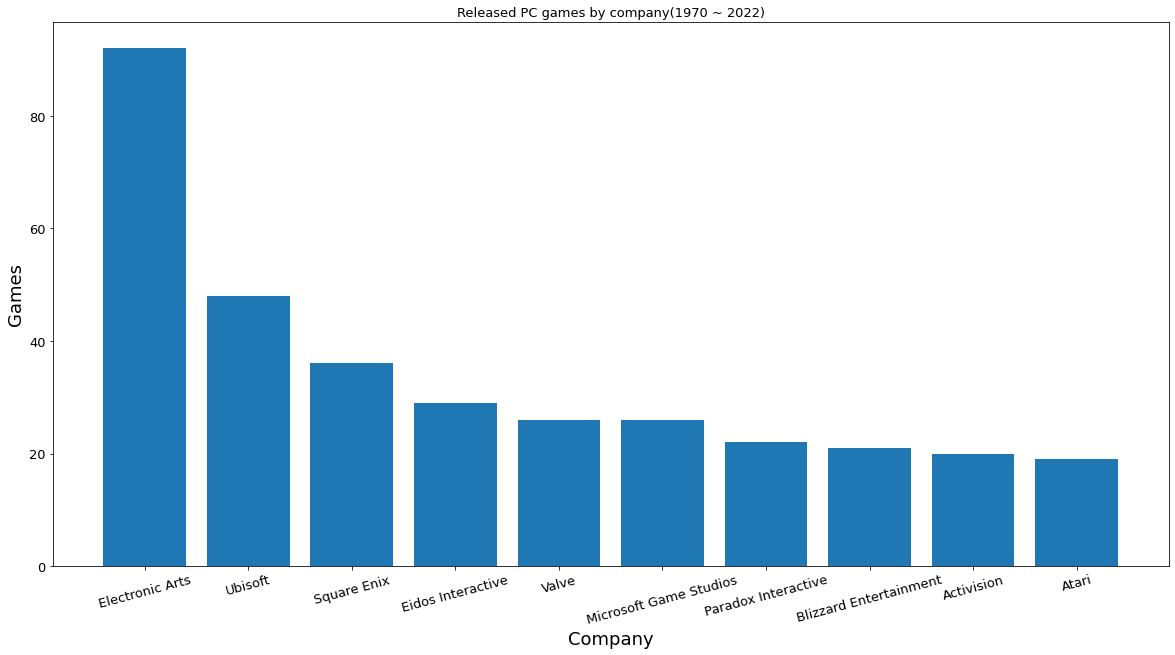

In [75]:
made_by = df.groupby(['1st_producer']).agg('size').sort_values(ascending = False)

SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 21

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.figure(figsize = (20, 10))
plt.bar(made_by.index[0:10], made_by[0:10])
plt.xticks(rotation = 15)
plt.xlabel('Company')
plt.ylabel('Games')
plt.title("Released PC games by company(1970 ~ 2022)")

Text(0.5, 1.0, 'Released PC games by company(1970 ~ 2022)')

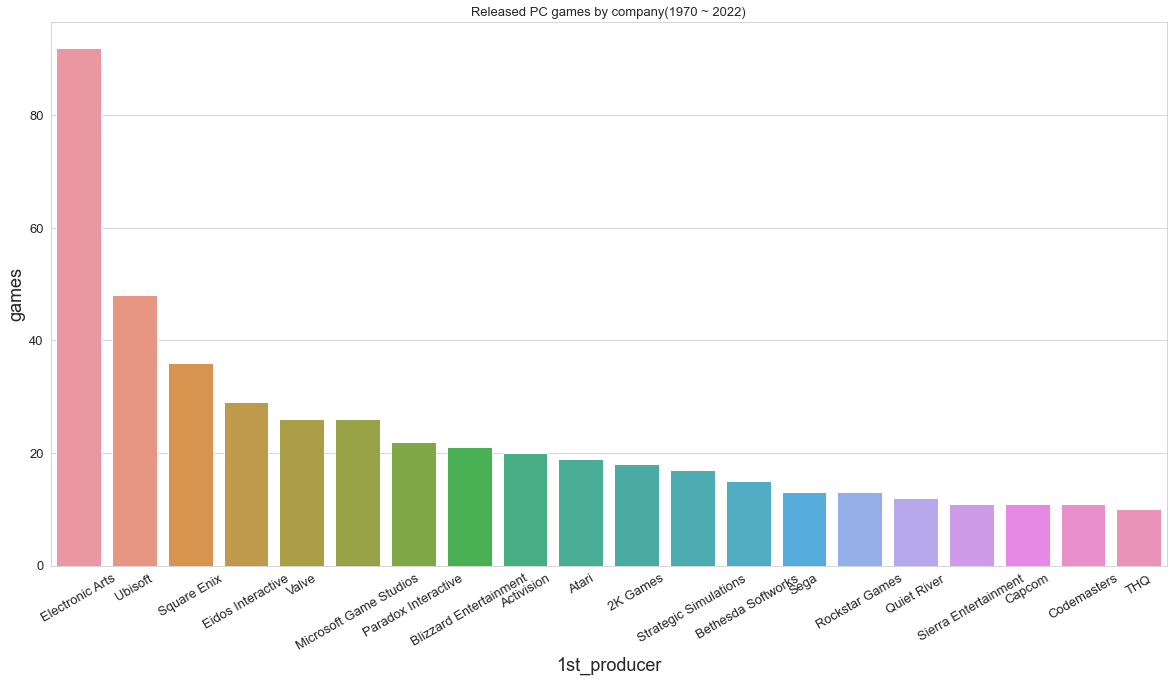

In [76]:
sns.set_style('whitegrid')

# sns로 같은 그래프 그리기
plt.figure(figsize = (20, 10))
sns.barplot(x = made_by.index[:20], y = made_by[:20])
plt.xticks(rotation = 30)
plt.ylabel('games')
plt.title("Released PC games by company(1970 ~ 2022)")

### 2. 장르별로 발매된 총 게임의 수

Text(0.5, 1.0, 'Released PC games by Genres(1970 ~ 2022)')

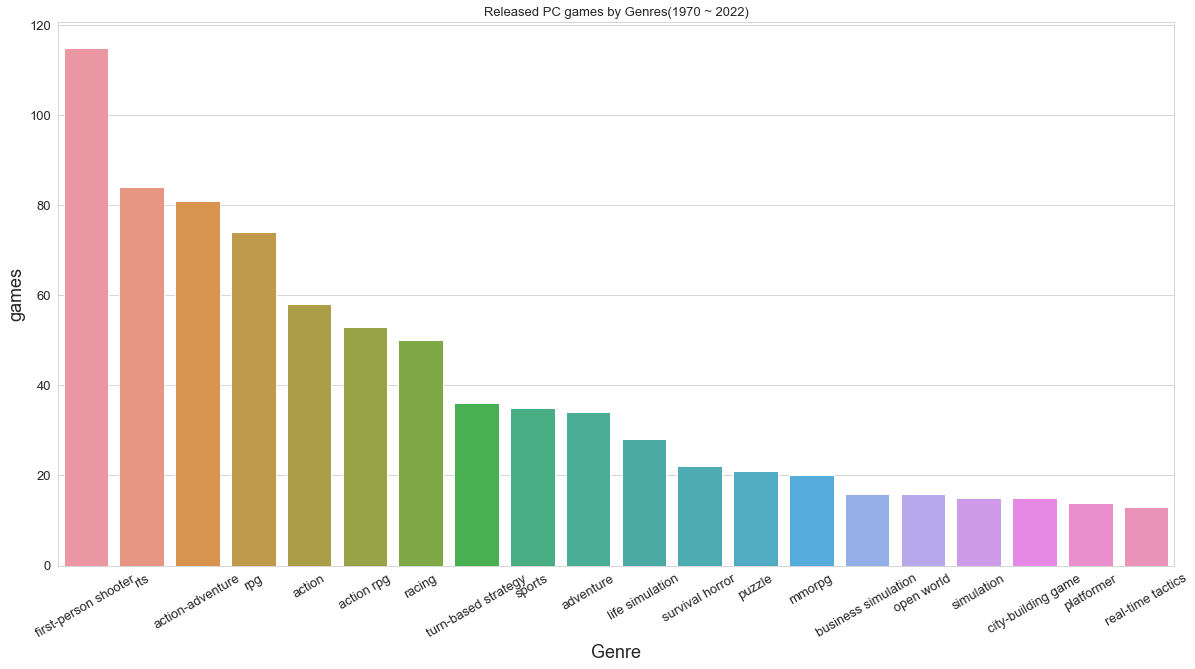

In [77]:
genre_by = df.groupby(['Genre']).agg('size').sort_values(ascending = False)

plt.figure(figsize = (20, 10))
sns.barplot(x = genre_by.index[:20], y = genre_by[:20])
plt.xticks(rotation = 30)
plt.ylabel('games')
plt.title("Released PC games by Genres(1970 ~ 2022)")

### 3. 연도별로 발매된 총 게임의 수

Text(0.5, 1.0, 'Released games by company(1970 ~ 2022)')

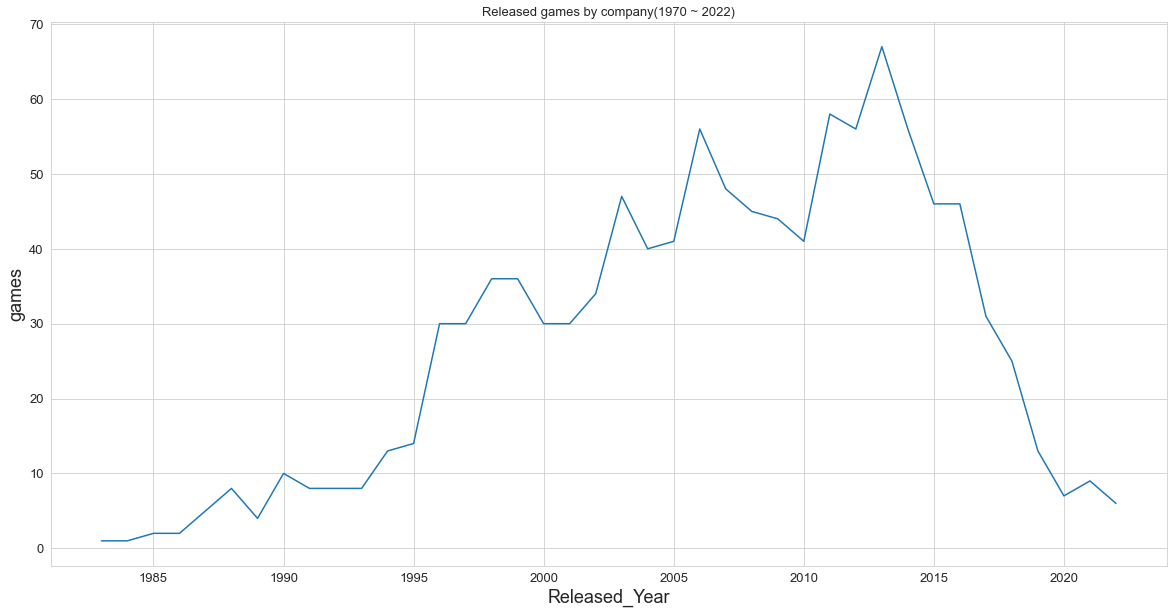

In [78]:
time_by = df.groupby(['Released_Year']).agg('size')

# time_by
plt.figure(figsize = (20, 10))
sns.lineplot(x = time_by.index, y = time_by)
# plt.xticks(rotation = 30)
plt.ylabel('games')
plt.title("Released games by company(1970 ~ 2022)")

### 4. 연도 별 출시된 게임 장르 시각화
- 총 발매 수 상위 n개 장르의 연도 별 출시 수를 시각화

In [79]:
n = 3
top_n_genre = genre_by.index[:n]
# print(top_n_genre)

In [80]:
top_n_genre_df = df[df['Genre'].isin(top_n_genre)]
# print(top_n_genre_df)

In [81]:
top_n_genre_year_df = top_n_genre_df.groupby(['Released_Year', 'Genre']).agg('size').to_frame()
top_n_genre_year_df.reset_index(inplace = True)

Text(0.5, 1.0, 'top 3 genres by year')

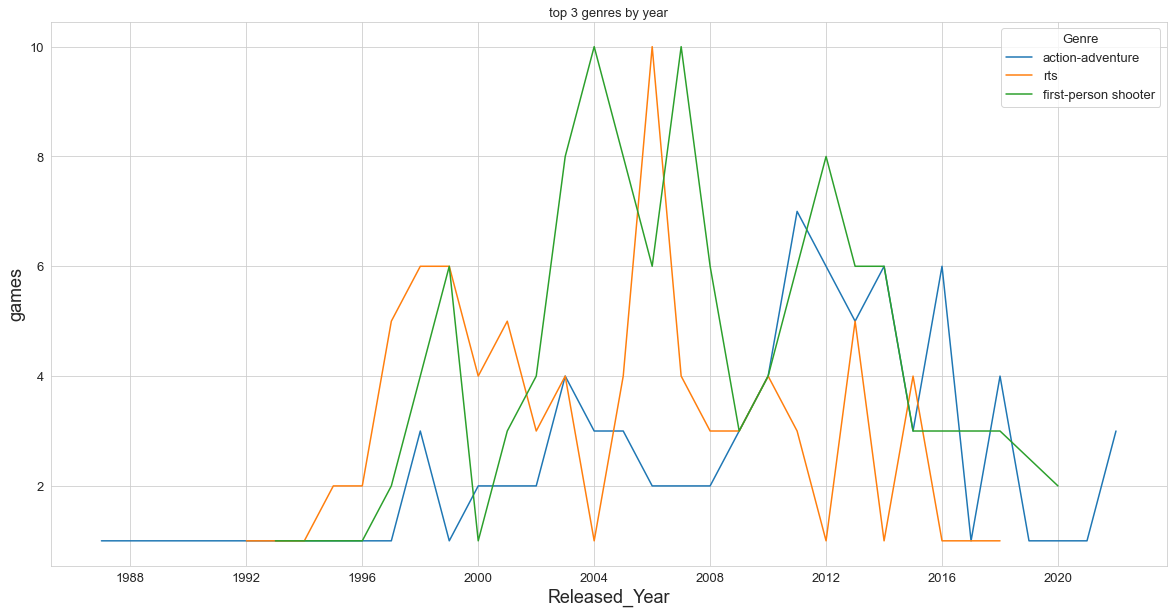

In [82]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = top_n_genre_year_df, x = 'Released_Year', y = 0, hue = 'Genre')
plt.ylabel('games')
plt.title(f'top {n} genres by year')

### 5. OS와 게임 숫자
- 여러 플랫폼으로 나왔더라도 가장 먼저 나온 플랫폼을 따라감
- 크게 따지는 게 의미가 없는 수준일 것 같음 : 데이터 정리 전에도 Windows의 숫자가 압도적
- 굳이 얻어낼 정보라면 DOS가 언제까지 흥했는가 정도?

In [83]:
df.sample(3)

,Name,Genre,Released_Year,1st_developer,1st_producer,1st_os
812,Shadow of the Tomb Raider,action-adventure,2018-01-01,Eidos Montréal,Square Enix,Windows
521,Hitman 2: Silent Assassin,action-adventure,2002-01-01,IO Interactive,Eidos Interactive,Windows
172,Battlefield Heroes,first-person shooter,2009-01-01,EA Digital Illusions CE,Electronic Arts,Windows


In [84]:
df['1st_os'].value_counts()

Windows         1000
MS-DOS            57
DOS               10
Amiga              7
Apple II           3
Mac                3
MSX2               2
Commodore 64       2
Amstrad CPC        2
Linux              2
BeOS               1
Xbox               1
Android            1
IBM PC             1
Name: 1st_os, dtype: int64

In [85]:
# OS 상위 n개 자르기
n = 3
top_n_os = df['1st_os'].value_counts().index[:n]
top_n_os = df[df['1st_os'].isin(top_n_os)].loc[:]

In [86]:
top_n_os_df = top_n_os.groupby(['1st_os', 'Released_Year']).agg('size').to_frame().reset_index()

In [87]:
top_n_os_df.rename(columns = {0 : 'counts'}, inplace = True)
# top_n_os_df

Text(0.5, 1.0, 'Released Games by OS')

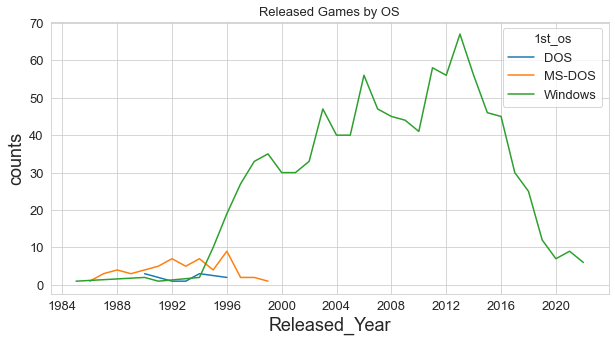

In [196]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = top_n_os_df, x = 'Released_Year', y = 'counts', hue = '1st_os')
plt.title('Released Games by OS')

- 검색 결과 윈도우 95의 출시일이 1995년 8월 24일로 나타남(그 이전엔 DOS에서 돌아가는 S/W였다고 한다)
- 사실상 윈도우95의 출시와 동시에 거대한 이동이 일어났을 뿐만 아니라, 발매되는 게임의 숫자 또한 기하급수적으로 늘어났다고 볼 수 있다.
    - 물론 이 데이터를 어디까지 신뢰할 수 있는지는 의문이 있지만?

### 6. 게임사와 게임 장르
- 기간을 크게 두는 방법도 있고 전체 기간에 걸쳐 나온 게임 수를 보는 방법도 있을 것 같다.
- 일단 전체 기간에 대해 볼 건데, 역시 발매한 게임이 많은 순서로 보겠음

In [89]:
df.sample(3)

,Name,Genre,Released_Year,1st_developer,1st_producer,1st_os
709,Penumbra: Overture,survival horror,2007-01-01,Frictional Games,Frictional Games,Windows
710,Penumbra: Requiem,survival horror,2008-01-01,Frictional Games,Paradox Interactive,Windows
155,Baldur's Gate: Tales of the Sword Coast,rpg,1999-01-01,BioWare,Black Isle Studios,Windows


In [191]:
# 회사 순위 : 게임을 가장 많이 만든 순서
company_rank = df.groupby('1st_producer').agg('size').sort_values(ascending = False).index

In [192]:
from matplotlib.ticker import MaxNLocator
import numpy as np
def type_rank(rank = 0):

    rank_0_df = df[df['1st_producer'] == company_rank[rank]].groupby('Genre').agg('size').sort_values(ascending = False)
    rank_0_df = rank_0_df.to_frame().reset_index().rename(columns = {0 : 'counts'})

    fig, ax = plt.subplots(figsize = (10, 5))
    sns.barplot(data = rank_0_df, x = 'Genre', y = 'counts', ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, ha = 'right')
#     ax.get_y_axis().set_major_locator(MaxNLocator(integer = True))
    ax.set_title(f'Game Genre Produced By {company_rank[rank]}', fontsize = 20)
    
    # ylabel 정수값만 얻기
    loc, labels = plt.yticks()
    plt.yticks(np.arange(0, max(loc), step = 1))
    

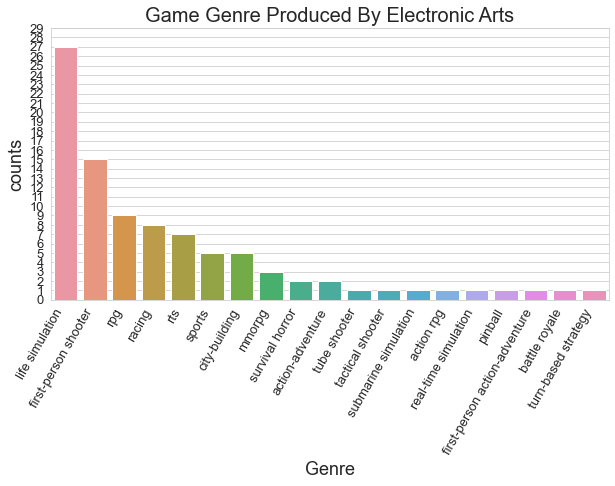

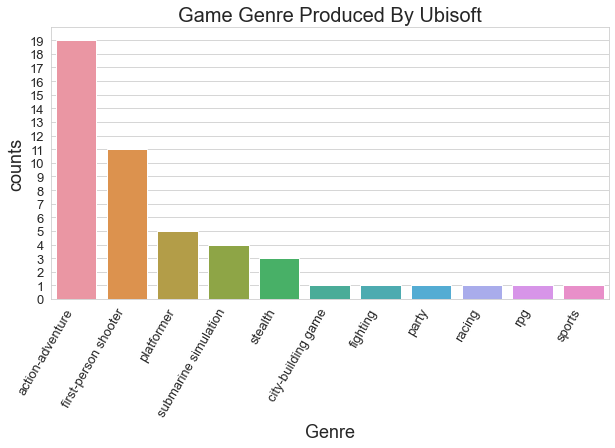

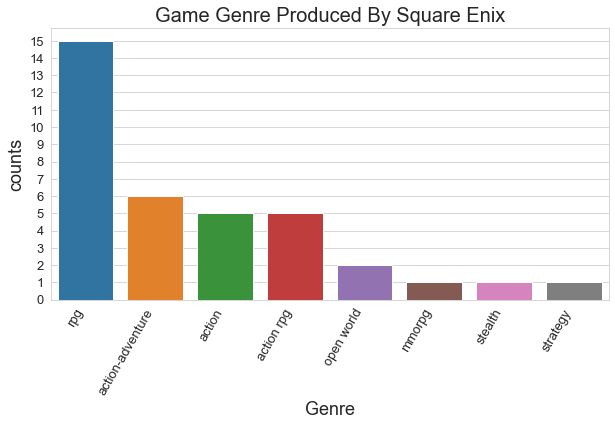

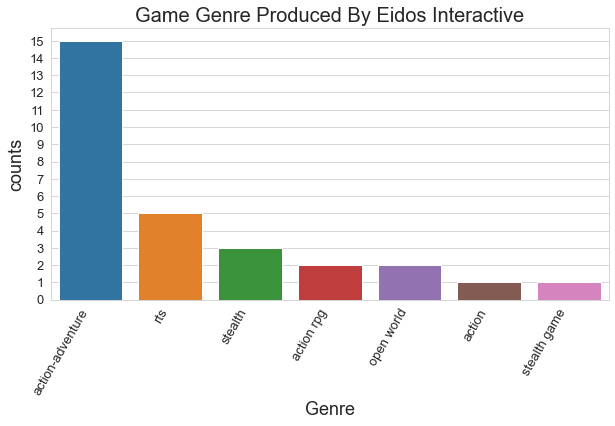

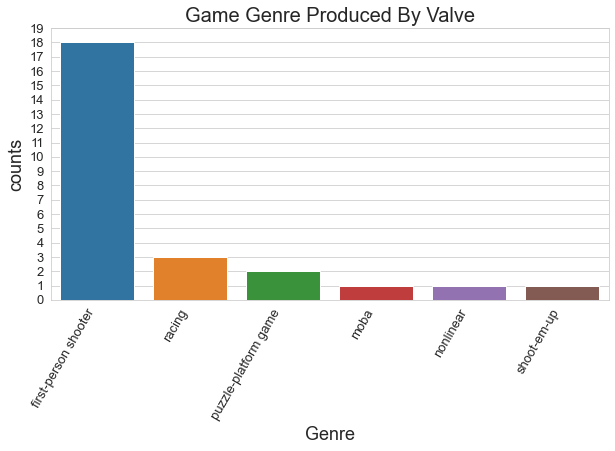

In [193]:
# 상위 5개 기업 세로로 쫙 나열해보기
for i in range(5):
    type_rank(i)

- 각 게임사 별로 가장 많이 개발한 게임은
    - EA는 life simulation(심즈겠지?)
    - 유비는 액션 어드벤쳐 
    - 스퀘어에닉스는 rpg
    - 아이도스 인터랙티브는 액션어드벤쳐 (현재 스퀘어에닉스의 유럽 자회사라고 한다)
    - 밸브는 fps
    - 마이크로소프트는 rts
- 상위 3개의 장르가 액션어드벤쳐, rts, fps인 것과 일맥상통한다고 볼 수 있겠다

In [164]:
# 각 게임회사에서 가장 많이 만든 장르의 게임엔 어떤 게 있나 보자(시각화 X : 표만 뽑을 거임)
df[(df['1st_producer'] == 'Ubisoft') & (df['Genre'] == 'action-adventure')].loc[:,['Released_Year', 'Name', 'Genre']].sort_values(by = 'Released_Year')

,Released_Year,Name,Genre
735,2003-01-01,Prince of Persia: The Sands of Time,action-adventure
195,2003-01-01,Beyond Good & Evil,action-adventure
736,2004-01-01,Prince of Persia: Warrior Within,action-adventure
112,2007-01-01,Assassin's Creed,action-adventure
113,2009-01-01,Assassin’s Creed II,action-adventure
928,2010-01-01,Tom Clancy's Splinter Cell: Conviction,action-adventure
114,2010-01-01,Assassin's Creed: Brotherhood,action-adventure
360,2011-01-01,Driver: San Francisco,action-adventure
115,2011-01-01,Assassin's Creed: Revelations,action-adventure
116,2012-01-01,Assassin's Creed III,action-adventure


- 유비는 역시 어쌔신 크리드 시리즈일 거라고 예상되긴 했다.
    - 그 외에도 스플린터 쉘이나 파크라이 정도가 눈에 띄는데, 파크라이가 1개 밖에 없는 게 이상하니 검색해본다

In [166]:
df[df['Name'].str.contains('Far Cry')][['Released_Year', 'Name', 'Genre', '1st_producer']][:]

,Released_Year,Name,Genre,1st_producer
412,2004-01-01,Far Cry,first-person shooter,Ubisoft
413,2008-01-01,Far Cry 2,first-person shooter,Ubisoft
414,2012-01-01,Far Cry 3,first-person shooter,Ubisoft
415,2013-01-01,Far Cry 3: Blood Dragon,first-person shooter,Ubisoft
416,2014-01-01,Far Cry 4,first-person shooter,Ubisoft
417,2016-01-01,Far Cry Primal,action-adventure,Ubisoft


- 파크라이가 6까지 있는데, 5와 6은 조회되지 않는 모습이다. (이 DB에 없는 것 같다)

In [177]:
# 밸브 : 카운터스트라이크, 팀포트리스, 하프라이프 등이 조회된다
def producer_genre(producer, genre):
    return df[(df['1st_producer'] == producer) & (df['Genre'] == genre)].loc[:,['Released_Year', 'Name', 'Genre']].sort_values(by = 'Released_Year')

producer_genre("Valve", "first-person shooter")

,Released_Year,Name,Genre
282,1999-01-01,Counter-Strike,first-person shooter
910,1999-01-01,Team Fortress Classic,first-person shooter
307,2000-01-01,Day of Defeat,first-person shooter
317,2001-01-01,Deathmatch Classic,first-person shooter
286,2004-01-01,Counter-Strike: Source,first-person shooter
494,2004-01-01,Half-Life: Source,first-person shooter
495,2004-01-01,Half-Life 2: Deathmatch,first-person shooter
283,2004-01-01,Counter-Strike: Condition Zero,first-person shooter
490,2004-01-01,Half-Life 2,first-person shooter
308,2005-01-01,Day of Defeat: Source,first-person shooter


In [195]:
producer_genre("Electronic Arts", "life simulation") # 스포어 2개 빼고 다 심즈네 ㅋㅋㅋㅋㅋ

,Released_Year,Name,Genre
829,2000-01-01,The Sims,life simulation
849,2000-01-01,The Sims: Livin' Large,life simulation
848,2001-01-01,The Sims: House Party,life simulation
847,2001-01-01,The Sims: Hot Date,life simulation
853,2002-01-01,The Sims: Vacation,life simulation
852,2002-01-01,The Sims: Unleashed,life simulation
851,2003-01-01,The Sims: Superstar,life simulation
850,2003-01-01,The Sims: Makin' Magic,life simulation
830,2004-01-01,The Sims 2,life simulation
834,2005-01-01,The Sims 2: Nightlife,life simulation


- 포탈이 의외로 없다. 찾아보자.

In [182]:
df[df['Name'].str.contains('Portal')][:] # 퍼즐-플랫폼 게임이란다.

,Name,Genre,Released_Year,1st_developer,1st_producer,1st_os
728,Portal,puzzle-platform game,2007-01-01,Valve,Valve,Windows
729,Portal 2,puzzle-platform game,2011-01-01,Valve,Valve,Windows


- 그 외에 다른 3개 기업도 검색해본다.

In [185]:
producer_genre("Square Enix", "rpg")

,Released_Year,Name,Genre
352,2012-01-01,Dragon Quest X,rpg
422,2014-01-01,Final Fantasy III,rpg
423,2014-01-01,Final Fantasy IV,rpg
433,2014-01-01,Final Fantasy XIII,rpg
434,2014-01-01,Final Fantasy XIII-2,rpg
424,2015-01-01,Final Fantasy IV: The After Years,rpg
437,2015-01-01,Final Fantasy Type 0,rpg
583,2015-01-01,Lightning Returns: Final Fantasy XIII,rpg
430,2016-01-01,Final Fantasy IX,rpg
431,2016-01-01,Final Fantasy X/X-2 HD Remaster,rpg


- 파이널 판타지는 예상이 갔던 부분이고, 드퀘도 얘네 거였다.
- 근데 드래곤 퀘스트도 시리즈가 많지 않았나?

In [190]:
# df[df['Name'].str.contains('Dragon Quest')][:]
df[df['1st_producer'] == 'Square Enix'][:].sort_values(by = 'Released_Year')

,Name,Genre,Released_Year,1st_developer,1st_producer,1st_os
223,Call of Duty 4: Modern Warfare,action,2007-01-01,Infinity Ward,Square Enix,Windows
693,Order of War,strategy,2009-01-01,Wargaming,Square Enix,Windows
224,Call of Duty: Black Ops,action,2010-01-01,Treyarch,Square Enix,Windows
572,Lara Croft and the Guardian of Light,action-adventure,2010-01-01,Crystal Dynamics,Square Enix,Windows
231,Call of Duty: Modern Warfare 3,action,2011-01-01,Sledgehammer Games,Square Enix,Windows
332,Deus Ex: Human Revolution,action rpg,2011-01-01,Eidos Montréal,Square Enix,Windows
225,Call of Duty: Black Ops 2,action,2012-01-01,Treyarch,Square Enix,Windows
352,Dragon Quest X,rpg,2012-01-01,Square Enix,Square Enix,Windows
855,Sleeping Dogs,action-adventure,2012-01-01,United Front Games,Square Enix,Windows
228,Call of Duty: Ghosts,action,2013-01-01,Infinity Ward,Square Enix,Windows


- 드퀘의 경우는 그냥 데이터가 없나보다..
- 은근 굵직한 게 많다. 콜오브듀티 시리즈, 툼레이더 리메이크 시리즈, 니어 오토마타, 저스트코즈 등..

In [186]:
producer_genre("Eidos Interactive", "action-adventure")

,Released_Year,Name,Genre
931,1996-01-01,Tomb Raider,action-adventure
932,1997-01-01,Tomb Raider II,action-adventure
933,1998-01-01,Tomb Raider III,action-adventure
934,1999-01-01,Tomb Raider: The Last Revelation,action-adventure
519,2000-01-01,Hitman: Codename 47,action-adventure
935,2000-01-01,Tomb Raider: Chronicles,action-adventure
521,2002-01-01,Hitman 2: Silent Assassin,action-adventure
936,2003-01-01,Tomb Raider: The Angel of Darkness,action-adventure
520,2004-01-01,Hitman: Contracts,action-adventure
581,2005-01-01,Lego Star Wars: The Video Game,action-adventure


- 툼레이더 구작 시리즈와 히트맨이 눈에 띈다.

In [187]:
producer_genre("Microsoft Game Studios", "rts")

,Released_Year,Name,Genre
69,1997-01-01,Age of Empires,rts
70,1998-01-01,Age of Empires: The Rise of Rome,rts
73,1999-01-01,Age of Empires II: The Age of Kings,rts
74,2000-01-01,Age of Empires II: The Conquerors,rts
79,2002-01-01,Age of Mythology,rts
774,2003-01-01,Rise of Nations,rts
776,2004-01-01,Rise of Nations: Thrones and Patriots,rts
76,2005-01-01,Age of Empires III,rts
78,2006-01-01,Age of Empires III: The WarChiefs,rts
775,2006-01-01,Rise of Nations: Rise of Legends,rts


- 사실 제일 궁금했던 건 마소였는데, `에이지 오브 엠파이어`랑 `라이즈 오브 네이션`을 만들었다.

#### 이쯤 하고 대충 마무리하겠음
1. `pandas`, `seaborn`, `matplotlib`은 숙련도를 더 쌓아야겠다.
2. 뭔가 나중에 할 일(시각화)을 먼저 했고 먼저 할 일(조건을 바꿔가며 검색)을 나중에 한 느낌.
3. 장르를 어떻게 나눠야 할까에서 엄청 막혔다. 딱 정답이 없는 부분이라 더 그랬다.
    - 예를 들면 장르 내에서도 `,`로 구분되어 여러 개의 장르를 갖는 게임이 있는데, 얘네 처리를 어떻게 해야 할까
    - 혹은 개발자와 제작사가 여러 개 있다면 이 데이터들을 어떻게 처리해야 하는가
    - 여기선 최대한 테이블을 따라가는 방식으로 진행했다. 